In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from astropy.io import fits
import seaborn as sns

In [8]:
#data

#tsi_daily = pd.read_csv("C:/Users/SSA/Desktop/Jesto Research/VIRGO SOHO/virgo_tsi_home.csv")
tsi_daily = pd.read_csv("C:/Users/SSA/Desktop/Beena/VIRGO_TSI_daily_V8_20220105.csv")
tsi_daily

,DateTime,TAI,TSI VIRGO A degradation corrected(org),TSI VIRGO A+B,Uncertainty of fused VIRGO A+B series,TSI VIRGO A degradation corrected(new),TSI VIRGO A+B – Fused (new)
0,18/01/96,1200614430,1365.126,1365.208,0.144,1360.485,1360.566
1,19/01/96,1200700830,1365.191,1365.173,0.144,1360.549,1360.531
2,20/01/96,1200787230,1365.185,1365.157,0.146,1360.543,1360.515
3,21/01/96,1200873630,1365.161,1365.152,0.145,1360.519,1360.511
4,22/01/96,1200960030,1365.155,1365.156,0.144,1360.513,1360.514
...,...,...,...,...,...,...,...
9234,30/04/21,2017008037,1365.693,1365.669,0.156,1361.051,1361.026
9235,01/05/21,2017094437,1365.688,1365.678,0.159,1361.045,1361.035
9236,02/05/21,2017180837,1365.657,1365.647,0.181,1361.014,1361.004
9237,03/05/21,2017267237,1365.632,1365.635,0.193,1360.989,1360.992


In [9]:
#Setting Date column
tsi_daily["Date"]=pd.DataFrame(pd.date_range(start='1996-01-18', end='2021-05-04'))

tsi_daily['Day'] = pd.DatetimeIndex(tsi_daily['Date']).day
tsi_daily['Month'] = pd.DatetimeIndex(tsi_daily['Date']).month
tsi_daily['Year'] = pd.DatetimeIndex(tsi_daily['Date']).year

tsi_daily=tsi_daily.rename(columns={"TSI VIRGO A+B – Fused (new)":"Virgo(new)"})
tsi_daily

,DateTime,TAI,TSI VIRGO A degradation corrected(org),TSI VIRGO A+B,Uncertainty of fused VIRGO A+B series,TSI VIRGO A degradation corrected(new),Virgo(new),Date,Day,Month,Year
0,18/01/96,1200614430,1365.126,1365.208,0.144,1360.485,1360.566,1996-01-18,18,1,1996
1,19/01/96,1200700830,1365.191,1365.173,0.144,1360.549,1360.531,1996-01-19,19,1,1996
2,20/01/96,1200787230,1365.185,1365.157,0.146,1360.543,1360.515,1996-01-20,20,1,1996
3,21/01/96,1200873630,1365.161,1365.152,0.145,1360.519,1360.511,1996-01-21,21,1,1996
4,22/01/96,1200960030,1365.155,1365.156,0.144,1360.513,1360.514,1996-01-22,22,1,1996
...,...,...,...,...,...,...,...,...,...,...,...
9234,30/04/21,2017008037,1365.693,1365.669,0.156,1361.051,1361.026,2021-04-30,30,4,2021
9235,01/05/21,2017094437,1365.688,1365.678,0.159,1361.045,1361.035,2021-05-01,1,5,2021
9236,02/05/21,2017180837,1365.657,1365.647,0.181,1361.014,1361.004,2021-05-02,2,5,2021
9237,03/05/21,2017267237,1365.632,1365.635,0.193,1360.989,1360.992,2021-05-03,3,5,2021


In [10]:
#checking for null values(-99)

int(-99) in tsi_daily["Virgo(new)"]

False

## TSI DAILY DATA PLOT

C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 4390.0)

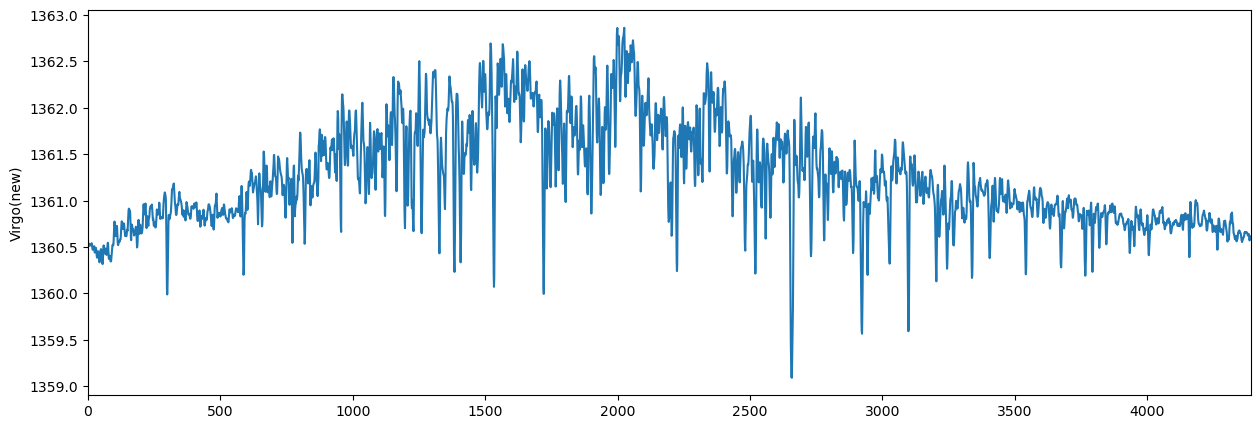

In [11]:
#Daily TSI plot
plt.rcParams['figure.figsize'] = [15,5]
sns.lineplot(range(0,9239),tsi_daily["Virgo(new)"])
plt.xlim(0,4390) #1996-2008
#plt.ylim(12)
#tsi_daily.iloc[:4390]

## TSI MONTHLY PLOT

In [12]:
#Converting to monthly data

tsi_month=pd.DataFrame(tsi_daily.groupby(["Year","Month"])["Virgo(new)"].mean())
tsi_month

tsi_month.to_csv("tsi_month.csv")
tsi_month=pd.read_csv("tsi_month.csv")
tsi_month

,Year,Month,Virgo(new)
0,1996,1,1360.526643
1,1996,2,1360.455586
2,1996,3,1360.430645
3,1996,4,1360.499033
4,1996,5,1360.643645
...,...,...,...
300,2021,1,1360.835903
301,2021,2,1360.797286
302,2021,3,1360.914226
303,2021,4,1360.952033


In [13]:
#Converting to monthly data
tsi_month["year_month"]=tsi_month["Year"].astype(str) +"-"+tsi_month["Month"].astype(str)
tsi_month

tsi_month.to_csv("tsi_month.csv",index=False)
tsi_month=pd.read_csv("tsi_month.csv")

tsi_month



,Year,Month,Virgo(new),year_month
0,1996,1,1360.526643,1996-1
1,1996,2,1360.455586,1996-2
2,1996,3,1360.430645,1996-3
3,1996,4,1360.499033,1996-4
4,1996,5,1360.643645,1996-5
...,...,...,...,...
300,2021,1,1360.835903,2021-1
301,2021,2,1360.797286,2021-2
302,2021,3,1360.914226,2021-3
303,2021,4,1360.952033,2021-4


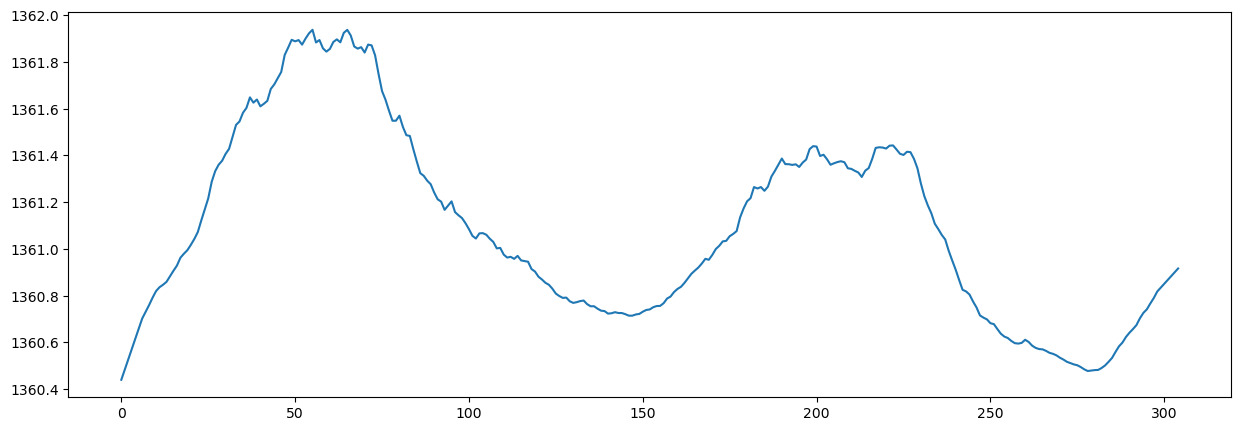

In [14]:
#Smoothning the curve

from scipy import signal
import itertools

yhat_2 = signal.savgol_filter(tsi_month["Virgo(new)"], 13,1)
plt.plot(yhat_2)


In [15]:
tsi_month_smooth=tsi_month.drop(columns=["Virgo(new)"])
tsi_month_smooth["Virgo(new)"]=yhat_2

tsi_month_smooth.to_csv("tsi_month_smooth.csv",index=False)
tsi_month_smooth=pd.read_csv("tsi_month_smooth.csv")

tsi_month_smooth

,Year,Month,year_month,Virgo(new)
0,1996,1,1996-1,1360.440078
1,1996,2,1996-2,1360.483694
2,1996,3,1996-3,1360.527311
3,1996,4,1996-4,1360.570927
4,1996,5,1996-5,1360.614543
...,...,...,...,...
300,2021,1,2021-1,1360.850470
301,2021,2,2021-2,1360.866862
302,2021,3,2021-3,1360.883254
303,2021,4,2021-4,1360.899645


(0.0, 160.0)

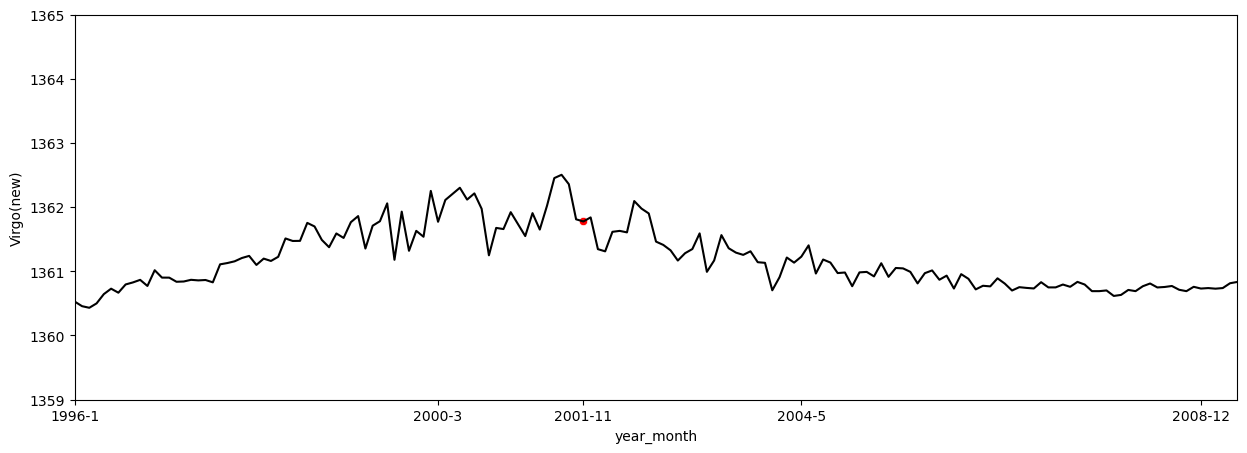

In [16]:
#Plotting the TSI MONTHLY OSCILLATIONS

plt.rcParams['figure.figsize'] = [15,5]
ax=sns.lineplot(x=tsi_month["year_month"],y=tsi_month["Virgo(new)"],color='black').set(xticks=[0,50,70,100,155])

#solar maximum for cycle 23 was on 2001-11
sns.scatterplot(x=[tsi_month.iloc[70]["year_month"]],y=tsi_month.iloc[70]["Virgo(new)"],color='red')
plt.ylim(1359,1365)
plt.xlim(0,160) #setting the graph for 23rd cycle (till 2008)


## YEARLY PLOT

In [17]:
tsi_year=pd.DataFrame(tsi_month.groupby("Year")["Virgo(new)"].mean())

tsi_year.to_csv("tsi_year.csv")
tsi_year=pd.read_csv("tsi_year.csv")
tsi_year[:13]

,Year,Virgo(new)
0,1996,1360.685177
1,1997,1360.957432
2,1998,1361.390945
3,1999,1361.640740
4,2000,1361.921855
5,2001,1361.959707
6,2002,1361.569992
7,2003,1361.285575
8,2004,1361.049276
9,2005,1360.973081


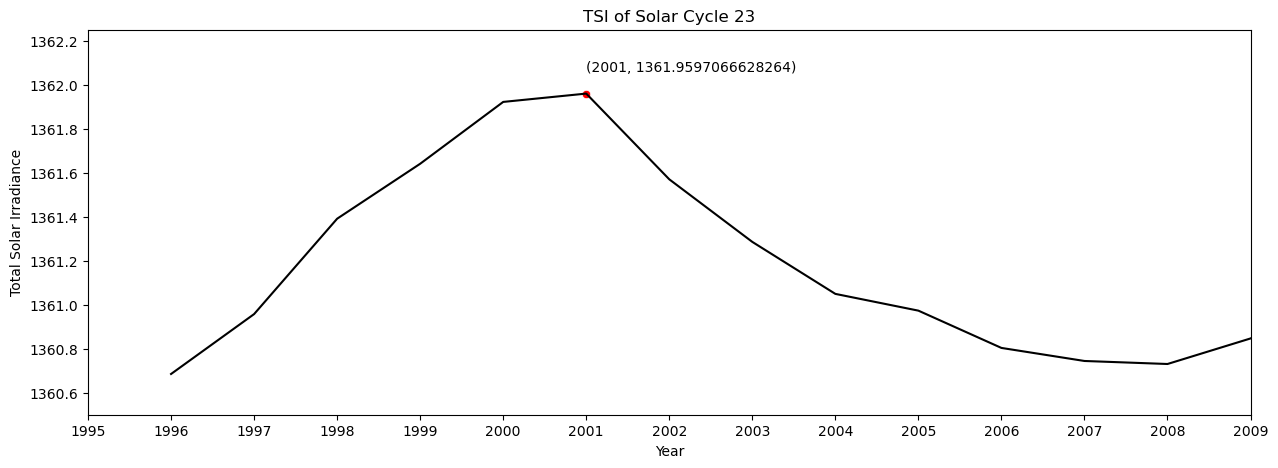

In [18]:
#Plotting the TSI YEARLY

#plt.rcParams['figure.figsize'] = [15,5]
ax=sns.lineplot(x=tsi_year["Year"],y=tsi_year["Virgo(new)"],color='black').set(xticks=range(1995,2015))

#solar maximum for cycle 23 was on 2001-11
sns.scatterplot(x=[2001],y=tsi_year.iloc[5]["Virgo(new)"],color='red')
plt.xlim(1995,2009)
plt.title("TSI of Solar Cycle 23")
plt.ylabel("Total Solar Irradiance")
plt.ylim(1360.5,1362.25)


for i, j in zip([2001], [tsi_year.iloc[5]["Virgo(new)"]]):
   plt.text(i, j+0.1, '({}, {})'.format(i, j))

C:\Users\SSA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Virgo(new)'>

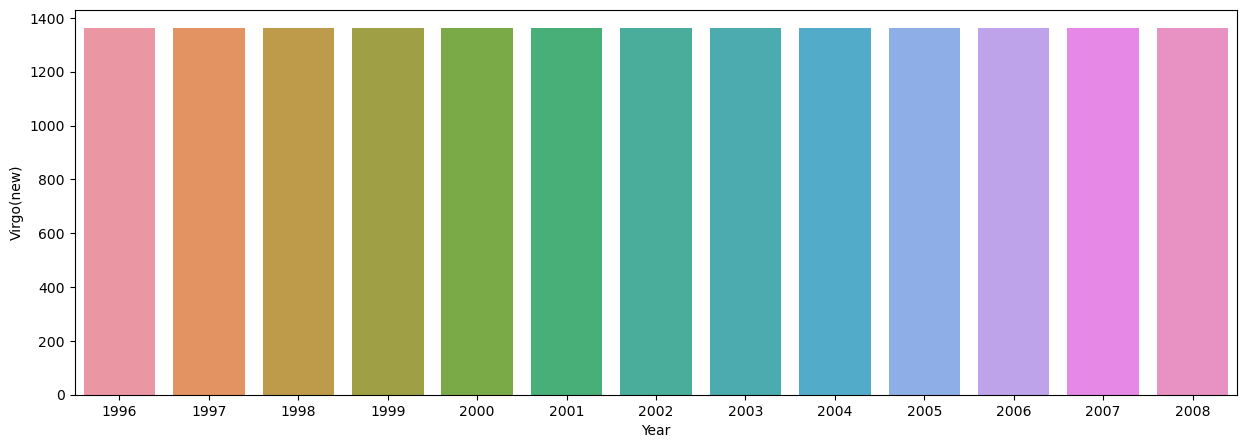

In [19]:
#We get the max oscillation mag in 2001, that is the solar max year of 23rd Cycle
sns.barplot(tsi_year["Year"].iloc[:13],tsi_year["Virgo(new)"].iloc[:13])